<a href="https://colab.research.google.com/github/unmei211/machine-learning/blob/main/07_hw_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Домашняя работа. Pandas

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература

- http://pandas.pydata.org/pandas-docs/stable/10min.html
- https://pandas.pydata.org/pandas-docs/stable/indexing.html
- https://pandas.pydata.org/pandas-docs/stable/missing_data.html

В этом задании мы с вами рассмотрим датасет [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult).
Основывается он на данных переписи населения 1994 года в США.

Расшифровка содержимого колонок:

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous. sampling weight, more here: SIPP Weighting.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous. Income from investment sources, apart from wages/salary.
- capital-loss: continuous. Losses from investment sources, apart from wages/salary.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [4]:
import pandas as pd
import numpy as np
pd.__version__ # 1.4.1

'1.5.3'

In [5]:
columns='age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income'.split(',')
df = pd.read_csv('adult.csv.gz', na_values='?') # можно загрузить из файла или URL
# df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values='?', names=columns)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


1) Выведите последние 10 элеметнов датасета

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.tail(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32551,43,Self-emp-not-inc,27242,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K
32552,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32553,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32554,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32555,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


2) Сколько колонок и сколько строк в этом датасете?

In [8]:
print("колонны" , df.columns.size)
print("строки" , df.index.size)

колонны 15
строки 32561


3) Какие типы данных у элементов этого датасета?

In [9]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

4) Какие признаки имеют пропуски?

In [10]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

5) Как вы думаете, с чем связаны пропуски этих значение. Напишите развернутый ответ в ячейке ниже.

Ваш ответ: Отсутствие данных оч ем либо.


6) Какие и сколько различных рабочих классов workclass представлено в выборке?

In [11]:
df['workclass'].nunique()

8

7) Какой средний возраст женщин и мужчин?

In [12]:
df.groupby(['sex'])['age'].mean()

sex
Female    36.858230
Male      39.433547
Name: age, dtype: float64

8) Постройте гистограмму(bar) распределения образования людей (education)

<Axes: >

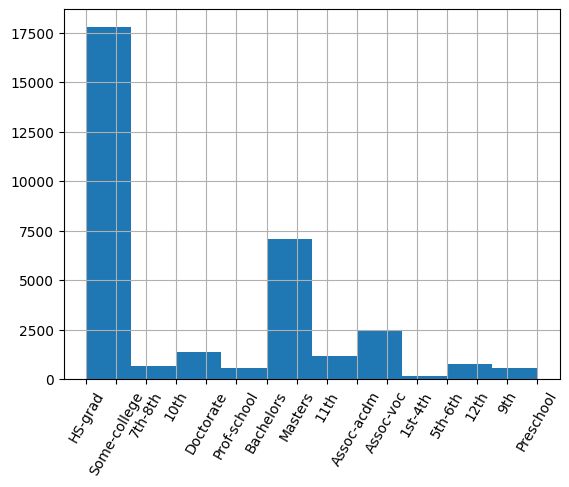

In [16]:
df['education'].hist(xrot=60)

9) Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак salary) и тех, кто получает менее 50K в год?

In [17]:
print(df.groupby(['income'])['age'].mean())
print(df.groupby(['income'])['age'].std())

income
<=50K    36.783738
>50K     44.249841
Name: age, dtype: float64
income
<=50K    14.020088
>50K     10.519028
Name: age, dtype: float64


10) Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)

In [20]:
print (len(df[df['income']== '>50K']))
print(len(df[(df['income']=='>50K') & df['education'].isin(['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate'])]))

7841
4535


11) Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.

In [21]:
print(df[((df['marital.status'].str.contains('Married')) == False) & (df['sex'] == 'Male') & (df['income'] == '>50K')].index.size)
print(df[((df['marital.status'].str.contains('Married'))) & (df['sex'] == 'Male') & (df['income'] == '>50K')].index.size)

697
5965


12) Посчитайте среднее время работы (hours-per-week) зарабатывающих мало и много (salary) для каждой страны (native-country).

In [22]:
df.groupby(['native.country']).apply(lambda x: x[x['income'] == '>50K' ]['hours.per.week'].mean())



native.country
Cambodia                      40.000000
Canada                        45.641026
China                         38.900000
Columbia                      50.000000
Cuba                          42.440000
Dominican-Republic            47.000000
Ecuador                       48.750000
El-Salvador                   45.000000
England                       44.533333
France                        50.750000
Germany                       44.977273
Greece                        50.625000
Guatemala                     36.666667
Haiti                         42.750000
Holand-Netherlands                  NaN
Honduras                      60.000000
Hong                          45.000000
Hungary                       50.000000
India                         46.475000
Iran                          47.500000
Ireland                       48.000000
Italy                         45.400000
Jamaica                       41.100000
Japan                         47.958333
Laos                     

13) Постройте сводную таблицу для сравнения уровня образования и разницы между capital.gain и capital.loss (то есть пассивный доход). Сделайте так, чтобы capital.gain - capital.loss создали не больше 10 разных уникальных значений. То есть, gain и loss - это числа в каком-то диапазоне. Это количественные признаки из вещественных чисел. С помощью математических функций, типа log, извлечение корня N-ой степени и округления можно перейти к категориальным признакам.

In [23]:
df['diff'] = df['capital.gain'] - df['capital.loss']

df = df.loc[df['diff'].isnull() == False]
df = df.loc[df['diff'] != 0]
categorial_diff = np.round(np.log(df['diff']) / np.log(5),0)

df['categorial_diff'] = categorial_diff
df = df.loc[df['categorial_diff'].isnull() == False]
df['ones'] = np.ones(df.shape[0])
table = pd.pivot_table(df, index='education',columns='categorial_diff',values=['ones'],aggfunc="sum",fill_value=0)

print (table)

                ones                  
categorial_diff  3.0 4.0  5.0  6.0 7.0
education                             
10th               1   5   27    5   2
11th               0   9   32   12   0
12th               0   5    9    8   0
1st-4th            0   0    4    1   0
5th-6th            0   0   11    3   0
7th-8th            0   1   36    4   0
9th                2   5   23    0   1
Assoc-acdm         0   1   41   39   1
Assoc-voc          0   2   76   55   1
Bachelors          0   9  195  388  41
Doctorate          0   1   12   51  12
HS-grad            2  29  427  202  23
Masters            0   2   68  185  19
Preschool          0   0    1    0   1
Prof-school        0   1   15   87  46
Some-college       1  20  240  198  14


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


14) Женщины из каких стран получают в среднем большую зарплату (>50K) чаще.

In [24]:
df.groupby(['native.country']).apply(lambda x: (x[x['income'] == '>50K' ]['sex'] == "Female").mean()).sort_values(ascending = False)


native.country
Dominican-Republic    1.000000
France                1.000000
Scotland              1.000000
England               0.400000
South                 0.250000
Iran                  0.200000
Japan                 0.166667
Philippines           0.166667
United-States         0.164935
Germany               0.125000
Canada                0.125000
Vietnam               0.000000
Taiwan                0.000000
Puerto-Rico           0.000000
Poland                0.000000
Mexico                0.000000
Cambodia              0.000000
Jamaica               0.000000
Italy                 0.000000
India                 0.000000
Hungary               0.000000
Guatemala             0.000000
Greece                0.000000
El-Salvador           0.000000
Ecuador               0.000000
Cuba                  0.000000
China                 0.000000
Yugoslavia            0.000000
Columbia                   NaN
Ireland                    NaN
Laos                       NaN
Nicaragua               

15) Создайте случайную колонку - magic_salary, которую нужно будет вычислить следующим образом: если зарплата небольшая (<50K), тогда случайно выберите число из диапазона [0,50]. Если зарплата выше 50K тогда из диапазона [51, 200]. Посчитайте среднюю зарплату в час для групп людей с одни уровнем образования на основе нашей случайной колонки magic_salary

In [25]:

import random
df['magic_salary'] = df['income'].apply(lambda x: random.randint(51, 201) if x ==">50K" else random.randint(0, 51) )
df1  = df.groupby(['education']).apply(lambda x: x['magic_salary'].mean())
print(df1)


education
10th             42.875000
11th             61.622642
12th             75.090909
1st-4th          27.200000
5th-6th          43.000000
7th-8th          42.780488
9th              42.064516
Assoc-acdm       87.914634
Assoc-voc        89.455224
Bachelors       103.969984
Doctorate       118.302632
HS-grad          69.275256
Masters         103.120438
Preschool        35.500000
Prof-school     117.758389
Some-college     81.585624
dtype: float64
